# Examples

In [1]:
# Add path if package not installed
import sys
sys.path.append('../src')

## Minimal Snelson 3-Prism

The default constructor of the class `tnsgrt.prism.Prism`

In [2]:
from tnsgrt.prism import Prism
s = Prism()

produces a minimal Snelson 3-Prism, with 3 bars, 3 top and 3 bottom strings, 3 vertical strings, and a *twist angle* of 30 degrees, as in:

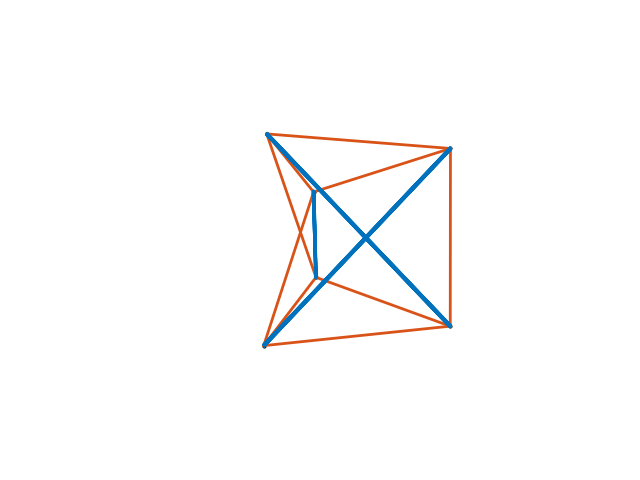

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from tnsgrt.plotter.matplotlib import MatplotlibPlotter
%matplotlib widget

plotter = MatplotlibPlotter()
plotter.plot(s)
_, ax = plotter.get_handles()
ax.view_init(elev=20, azim=45)
ax.axis('off')
plt.show()

The *twist angle* is the angle measured between the rotations of the top and bottom triangles, which can be better visualized from a different view point

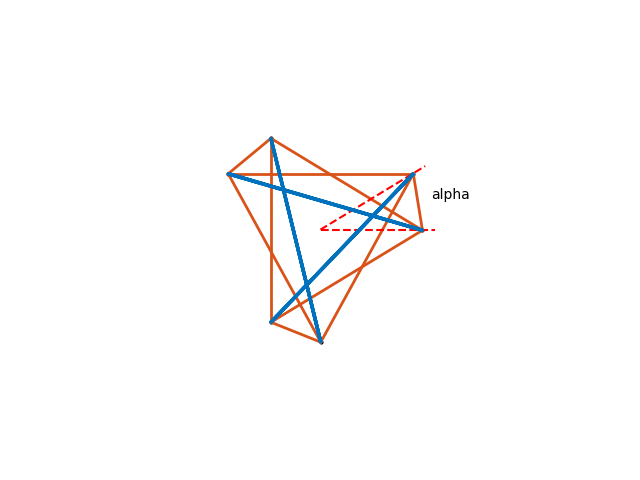

In [4]:
ax.view_init(elev=90, azim=-90)
ax.axis('off')
ax.plot([0, 1.1], [0, 0], 'r--')
ax.plot([0, 1.1*np.cos(np.pi/6)], [0, 1.1*np.sin(np.pi/6)], [1, 1], 'r--')
ax.text(1.1*np.cos(np.pi/12), 1.1*np.sin(np.pi/12), 0, 'alpha')
plt.show()

For a symmetric prism, this twist angle is the only possible equilibrium:

In [5]:
s.equilibrium()

which imparts bars and vertical strings the same magnitude of force coefficient:

In [6]:
s.member_properties[['lambda_']]

,lambda_
0,0.57735
1,0.57735
2,0.57735
3,0.57735
4,0.57735
5,0.57735
6,1.00000
7,1.00000
8,1.00000
9,-1.00000


Minimal Snelson Prisms have at least one soft mode, which can be confirmed by calculating the model stiffness with rigid body constraints

In [7]:
s.update_member_properties(['stiffness'])
stiffness, _, _ = s.stiffness(apply_rigid_body_constraint=True)

C:\Users\mauri\github\tensegrity\examples\../src\tnsgrt\structure.py:1381: UserWarning: number of nodes is small; storage set to 'dense'
  warnings.warn("number of nodes is small; storage set to 'dense'")


and evaluating its eigenvalues

In [8]:
d, v = stiffness.eigs()
d

array([2.77128123e+00, 4.68096753e+06, 4.68096753e+06, 1.23281719e+07,
       1.23281719e+07, 2.45882799e+07, 2.72069922e+07, 2.89745460e+07,
       2.89745460e+07, 6.68906843e+07, 6.68906843e+07, 8.82860836e+07])

The corresponding eigenvector is shown below:

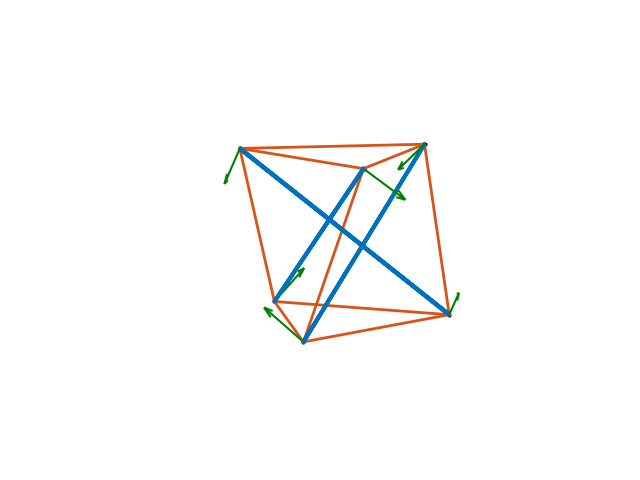

In [9]:
V = v[:,0].reshape((3, 6), order='F')

plotter = MatplotlibPlotter()
plotter.plot(s)
_, ax = plotter.get_handles()
ax.quiver(s.nodes[0,:], s.nodes[1,:], s.nodes[2,:], V[0,:], V[1,:], V[2,:], arrow_length_ratio=.2, color='g')
ax.view_init(10,20)
ax.axis('off')
plt.show()

which suggests that this mode is associated with a "corkscrew" like rotational motion of the structure.

The presence of this soft mode means that one should expect large displacements in response to compressive type forces such as:

In [10]:
f = 0.25*np.array([[0,0,1],[0,0,1],[0,0,1],[0,0,-1],[0,0,-1],[0,0,-1]]).transpose()

The corresponding approximate displacement can be obtained as:

In [11]:
x = stiffness.displacements(f)
x

array([[ 3.70368807e-09,  3.12499981e-02, -3.12500018e-02,
        -1.80421927e-02, -1.80421991e-02,  3.60843918e-02],
       [-3.60843918e-02,  1.80421991e-02,  1.80421927e-02,
         3.12500018e-02, -3.12499981e-02, -3.70368809e-09],
       [ 1.80422060e-02,  1.80422060e-02,  1.80422060e-02,
        -1.80422060e-02, -1.80422060e-02, -1.80422060e-02]])

Comparing the magnitude of the force with the magnitude of the displacement in the direction of the force

In [12]:
np.sum(f * x, axis=0)/np.linalg.norm(x, axis=0)**2

array([2.77128222, 2.77128222, 2.77128222, 2.77128222, 2.77128222,
       2.77128222])

we can observe the impact of the soft mode on the structure response. The displacements, scaled 10 times, are visualized along with the applied forces in the figure:

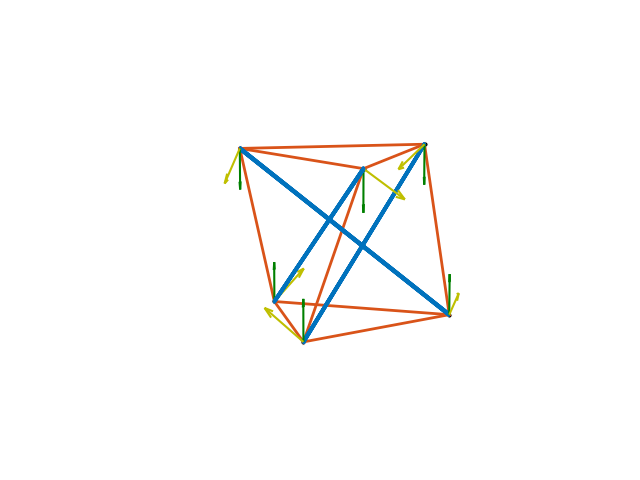

In [13]:
X = f
Y = 1e1*x

plotter = MatplotlibPlotter()
plotter.plot(s)
_, ax = plotter.get_handles()
ax.quiver(s.nodes[0,:], s.nodes[1,:], s.nodes[2,:], X[0,:], X[1,:], X[2,:], arrow_length_ratio=.2, color='g')
ax.quiver(s.nodes[0,:], s.nodes[1,:], s.nodes[2,:], Y[0,:], Y[1,:], Y[2,:], arrow_length_ratio=.2, color='y')
ax.view_init(elev=10, azim=20)
ax.axis('off')
plt.show()

## Non-minimal Snelson 3-Prism

With the addition of *diagonal* strings, Snelson 3-prisms can be constructed that are in equilibrium at twist angles other than 30 degrees. The following syntax

In [14]:
s = Prism(alpha=np.pi/5, diagonal=True)

produces one such prism. The indices of the additional diagonal strings can be obtained by searching for the tag `diagonal`:

In [15]:
diagonals = s.get_members_by_tag('diagonal')

We can use these indices to set the color of the diagonal strings

In [16]:
from tnsgrt import utils
s.set_member_properties(diagonals, 'facecolor', utils.Colors.GREEN.value)

The resulting prism is visualized below:

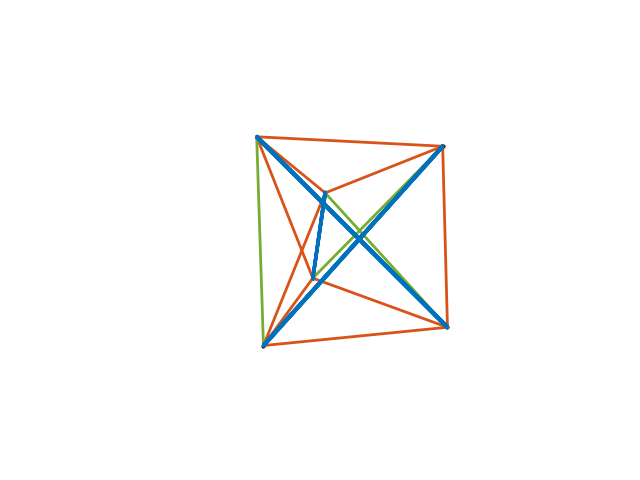

In [17]:
plotter = MatplotlibPlotter()
plotter.plot(s)
_, ax = plotter.get_handles()
ax.view_init(elev=20, azim=45)
ax.axis('off')
plt.show()

Note the presence of the additional diagonal strings in green.

Equilibrium of the prism and the member stiffness can be calculated as before:

In [18]:
s.equilibrium()
s.update_member_properties(['stiffness'])

Next we calculate the model stiffness with rigid body constraints and its eigenvalues

In [19]:
stiffness, _, _ = s.stiffness(apply_rigid_body_constraint=True)
d, v = stiffness.eigs()
d

C:\Users\mauri\github\tensegrity\examples\../src\tnsgrt\structure.py:1381: UserWarning: number of nodes is small; storage set to 'dense'
  warnings.warn("number of nodes is small; storage set to 'dense'")


array([ 8155119.28857138,  8155119.32303376, 10724386.65730408,
       22597331.51738646, 22597331.53205882, 23044828.3615394 ,
       27206992.1054677 , 31904308.57132992, 31904308.58462225,
       67275457.7848111 , 67275457.81789348, 96162998.90710123])

Note that there are no soft modes and the associated displacement in response to a compressive force is

In [20]:
x = stiffness.displacements(f)
x

array([[ 4.67852304e-09,  2.69664419e-09, -7.37516725e-09,
         3.67055099e-10, -6.63920199e-09,  6.27214691e-09],
       [-5.81496306e-09,  6.95920130e-09, -1.14423825e-09,
         7.45437077e-09, -3.40930631e-09, -4.04506444e-09],
       [ 1.20433839e-08,  1.20433838e-08,  1.20433839e-08,
        -1.20433839e-08, -1.20433838e-08, -1.20433839e-08]])

The corresponding stiffness in the direction of the applied force is

In [21]:
np.sum(f * x, axis=0)/np.linalg.norm(x, axis=0)**2

array([14998325.95619246, 14998326.0134659 , 14998325.97442743,
       14998325.97880422, 14998326.01181648, 14998325.9534651 ])

which is orders of magnitude higher than the displacement of the same minimal version of the prism that is soft.

The displacements, scaled $10^7$ times, are visualized along with the applied forces in the figure:

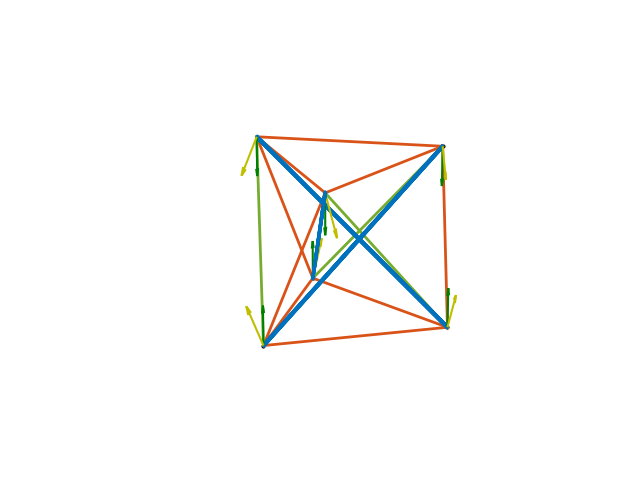

In [22]:
X = f
Y = 2e7*x

plotter = MatplotlibPlotter()
plotter.plot(s)
_, ax = plotter.get_handles()
ax.quiver(s.nodes[0,:], s.nodes[1,:], s.nodes[2,:], X[0,:], X[1,:], X[2,:], arrow_length_ratio=.2, color='g')
ax.quiver(s.nodes[0,:], s.nodes[1,:], s.nodes[2,:], Y[0,:], Y[1,:], Y[2,:], arrow_length_ratio=.2, color='y')
ax.view_init(elev=20, azim=45)
ax.axis('off')
plt.show()

## Bicycle wheel

In this example we will build a structure to illustrate how to combine simple modules into a larger structure. The goal is to build a tensegrity structure that resembles a *bicycle wheel*.

The wheel is parametrized by the following constants:

- $r$: the wheel radius;
- $n$: the number of sides of the "rim";
- $h$: the height of the central "hub",

which are defined below:

In [23]:
r = 1
h = .1
n = 24

We are going to break the design up into a series of similar units. Each unit consists of two bars and two strings. One bar is the wheel central "hub", aligned with the z-axis, and the other bar is a segment of the "rim," which lies on the x-y plane. The two strings make up the wheel "spokes", each one connecting one node from the "hub" to the end of the "rim" bar. We build such a unit as follows:

In [24]:
nodes = np.array([[0, 0, -h/2], [0, 0, h/2], [r, 0, 0], [r*np.cos(2*np.pi/n), r*np.sin(2*np.pi/n), 0]]).transpose()
strings = np.array([[0, 2], [1, 3]]).transpose()
bars = np.array([[0, 1], [2, 3]]).transpose()
members = np.hstack((strings, bars))
member_tags = {'hub': 2, 'rim': 3}

The tags `hub` and `rim` will later help us track those elements in the complete wheel. The resulting unit is the following Structure:

In [25]:
from tnsgrt.structure import Structure
unit = Structure(nodes, members, member_tags=member_tags, number_of_strings=strings.shape[1])
unit

Structure with 4 nodes, 2 bars and 2 strings

which is visualized in the figure generated by the following code which includes a frame at the origin for reference:

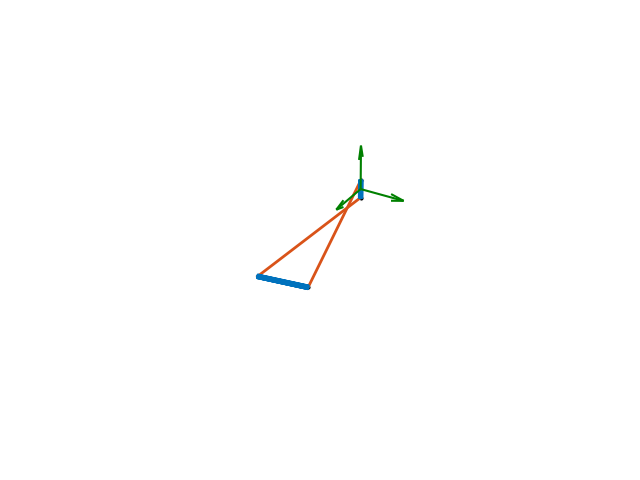

In [26]:
plotter = MatplotlibPlotter()
plotter.plot(unit)
_, ax = plotter.get_handles()
ax.view_init(elev=30, azim=30, roll=0)
ax.quiver([0, 0, 0], [0, 0, 0], [0, 0, 0], [1/4, 0, 0], [0, 1/4, 0], [0, 0, 1/4], color='g')
ax.axis('off')
ax.axis('equal')
plt.show()

Now imagine rotating this unit about the z-axis to build up the entire wheel. This is done below:

In [27]:
from tnsgrt import structure

wheel = Structure()
theta = 2*np.pi/n
for i in range(n):
    wheel.merge(structure.rotate(unit, i*theta*np.array([0, 0, 1])))

resulting in a structure with $4 n$, $2 n$ bars, and $2 n$ strings

In [28]:
wheel

Structure with 96 nodes, 48 bars and 48 strings

Of course, in building the above structure, we have also created $n$ copies of the central hub and coincident nodes at the edge of each rim member, which makes a total of $2 (n-1) + n$ redundant nodes. Those redundant nodes can be merged using `tnsgrt.structure.Structure.merge_close_nodes`:

In [29]:
wheel.merge_close_nodes()
wheel

Structure with 26 nodes, 48 bars and 48 strings

which reduces the total number of nodes from $4 n$ to $n + 2$. Yet, there are still $2 n$ bars, with $n$ of those being copies of the central hub. After using the method `tnsgrt.structure.Structure.merge_overlapping_members`

In [30]:
wheel.merge_overlapping_members()
wheel

Structure with 26 nodes, 25 bars and 48 strings

the number of bars reduces to $n + 1$. Since none of the strings overlap, they were not merged. The result of these merging operations left the structure with a single hub member

In [31]:
wheel.get_members_by_tag('hub')

array([2])

and $n$ rim members

In [32]:
wheel.get_members_by_tag('rim')

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54, 57, 60, 63, 66, 69, 72])

The final product is visualized below:

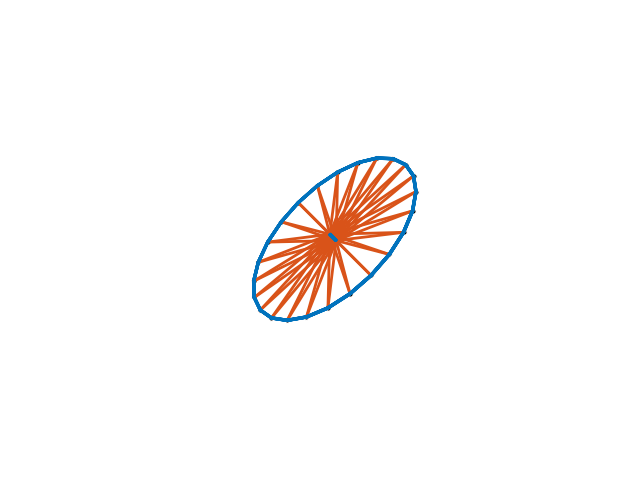

In [33]:
plotter = MatplotlibPlotter()
plotter.plot(wheel)
_, ax = plotter.get_handles()
ax.view_init(elev=30, azim=0, roll=45)
ax.axis('off')
ax.axis('equal')
plt.show()

For those who might be surprised by the fact that a wheel can be built out of a rim that is not a single rigid unit, we verify the stability of the design by calculating equilibrium under pretension

In [34]:
wheel.equilibrium()

and evaluating the stiffness of the model after updating the model's material properties

In [35]:
wheel.update_member_properties()
stiffness, _, _ = wheel.stiffness(apply_rigid_body_constraint=True)

The smallest eigenvalues of the stiffness matrix are indeed positive

In [36]:
d, v = stiffness.eigs()
d[:12]

array([78242.18249663, 78242.25229534, 78242.25229536, 78242.45693476,
       78242.4569348 , 78242.78246909, 78242.7824691 , 78243.20671365,
       78243.2067137 , 78243.70075695, 78243.70075697, 78244.23093065])

indicating that the structure is in a stable equilibrium under pretension. The individual member forces at equilibrium are shown below:

In [37]:
wheel.get_member_properties(wheel.get_members_by_tag('hub'), 'force')

2   -0.041879
Name: force, dtype: float64

In [38]:
wheel.get_member_properties(wheel.get_members_by_tag('rim'), 'force')

3    -0.267374
6    -0.267374
9    -0.267374
12   -0.267374
15   -0.267374
18   -0.267374
21   -0.267374
24   -0.267374
27   -0.267374
30   -0.267374
33   -0.267374
36   -0.267374
39   -0.267374
42   -0.267374
45   -0.267374
48   -0.267374
51   -0.267374
54   -0.267374
57   -0.267374
60   -0.267374
63   -0.267374
66   -0.267374
69   -0.267374
72   -0.267374
Name: force, dtype: float64

In [39]:
wheel.get_member_properties(wheel.get_members_by_tag('string'), 'force')

0     0.034943
1     0.034943
4     0.034943
5     0.034943
7     0.034943
8     0.034943
10    0.034943
11    0.034943
13    0.034943
14    0.034943
16    0.034943
17    0.034943
19    0.034943
20    0.034943
22    0.034943
23    0.034943
25    0.034943
26    0.034943
28    0.034943
29    0.034943
31    0.034943
32    0.034943
34    0.034943
35    0.034943
37    0.034943
38    0.034943
40    0.034943
41    0.034943
43    0.034943
44    0.034943
46    0.034943
47    0.034943
49    0.034943
50    0.034943
52    0.034943
53    0.034943
55    0.034943
56    0.034943
58    0.034943
59    0.034943
61    0.034943
62    0.034943
64    0.034943
65    0.034943
67    0.034943
68    0.034943
70    0.034943
71    0.034943
Name: force, dtype: float64